<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 3.4MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=c27abb58b98ed75cedce4c0570ebfd746e712d2525fdf4db0a282cb815ec8132
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [103]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [104]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [105]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [106]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [107]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [108]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 itens and each item itself list of 10 values 
    and S_actual, I_actual, R_actual are list of S, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """

S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [109]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]  

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]


In [110]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [120]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6], axis=1)
data.columns = range(data.shape[1])
#data[[1,4]] = data[[1,4]].apply(lambda x: x*10000)
data.head()

,0,1,2,3,4,5
0,202.845933,0.000049,797.154019,202.845924,0.000035,797.154041
1,995.198694,2.895122,1.906185,991.151826,4.904649,3.943526
2,991.151826,4.904649,3.943526,984.352774,8.262008,7.385218
3,202.895214,0.072228,797.032558,202.881798,0.052581,797.065621
4,204.027070,1.721882,794.251049,203.705524,1.254809,795.039667


In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
unscaled_data = scaler.inverse_transform(data_scaled)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5
0,4.172361e-08,3.161418e-07,1.000000,3.037322e-08,2.301377e-07,1.000000
1,9.952254e-01,1.880846e-02,0.002391,9.901495e-01,3.186355e-02,0.004943
2,9.901424e-01,3.186356e-02,0.004947,9.816096e-01,5.367498e-02,0.009261
3,6.194121e-05,4.692345e-04,0.999848,4.509028e-05,3.415970e-04,0.999889
4,1.483595e-03,1.118639e-02,0.996358,1.079729e-03,8.151993e-03,0.997348


In [124]:
X = data_scaled[[0,1,2]]
y = data_scaled[[3,4,5]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)




Epoch 00001: val_accuracy improved from -inf to 0.97375, saving model to weights-improvement-01-0.97.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy improved from 0.97375 to 0.98000, saving model to weights-improvement-02-0.98.hdf5

Epoch 00003: val_accuracy improved from 0.98000 to 0.98312, saving model to weights-improvement-03-0.98.hdf5

Epoch 00004: val_accuracy did not improve from 0.98312

Epoch 00005: val_accuracy did not improve from 0.98312

Epoch 00006: val_accuracy did not improve from 0.98312

Epoch 00007: val_accuracy did not improve from 0.98312

Epoch 00008: val_accuracy did not improve from 0.98312

Epoch 00009: val_accuracy did not improve from 0.98312

Epoch 00010: val_accuracy did not improve from 0.98312

Epoch 00011: val_accuracy did not improve from 0.98312

Epoch 00012: val_accuracy did not improve from 0.98312

Epoch 00013: val_accuracy did not improve from 0.98312

Epoch 00014: val_accuracy did not improve from 0.98312

Epoch 00015: val_accuracy did not improve from 0.98312

Epoch 00016: val_accuracy improved from 0.98312 to 0.98375, saving model to weights-improvement-16-0.98.hdf

In [127]:
predicted_y = model.predict(X_test)

In [128]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_y)

0.000881562670350983

In [129]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 33us/step
Accuracy: 98.45


In [130]:
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)
df_7 = pd.DataFrame(y_pred1)
df_8 = pd.DataFrame(y_pred2)

In [131]:
y_test.head()

,3,4,5
6252,1.482838e-10,1.121728e-09,1.000000
4684,5.776474e-11,4.353431e-10,1.000000
1731,3.575735e-06,2.709294e-05,0.999991
4742,3.705924e-13,1.981427e-12,1.000000
4521,9.955619e-01,1.796079e-02,0.002222


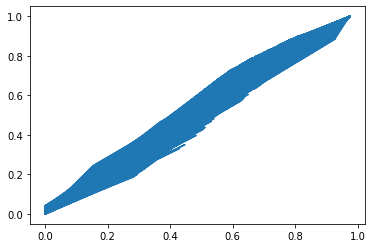

In [133]:
#plot of S_pred1 vs s_actual1                
#pred1 corresponds to prediction on training sets , where as actual1 corresponds actual value(y_train)
plt.figure(figsize=(6,4))
plt.plot(df_7[0],y_train[3])                                   

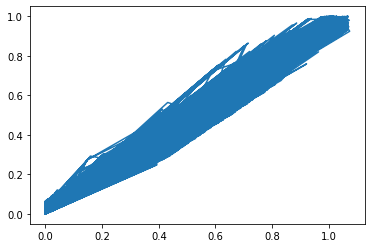

In [134]:
#plot of I_pred1 vs I_actual1
plt.figure(figsize=(6,4))
plt.plot(df_7[1],y_train[4])    

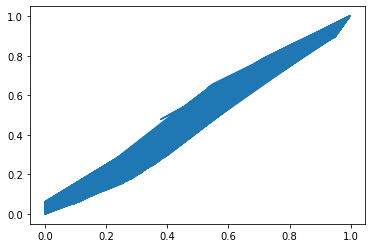

In [135]:
plt.figure(figsize=(6,4))
plt.plot(df_7[2],y_train[5])    #plot of R_pred1 vs R_actual1

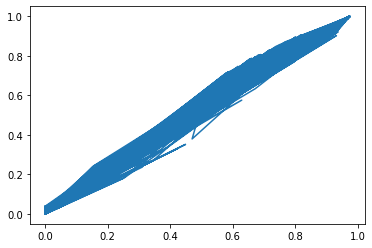

In [136]:
#plot of S_pred2 vs S_actual2
#pred2 corresponds to prediction on test sets , where as actual2 corresponds actual value(y_test)
plt.figure(figsize=(6,4))
plt.plot(df_8[0],y_test[3])    

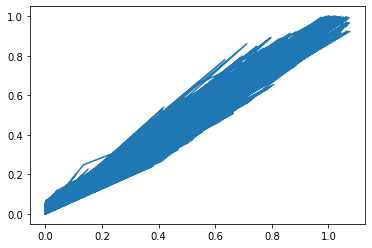

In [137]:
plt.figure(figsize=(6,4))
plt.plot(df_8[1],y_test[4])    #plot of I_pred2 vs I_actual2

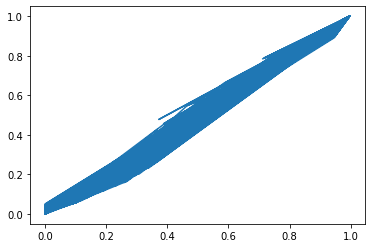

In [138]:
plt.figure(figsize=(6,4))
plt.plot(df_8[2],y_test[5])    #plot of R_pred2 vs R_actual2

In [139]:
comp_data = pd.DataFrame()

In [140]:
k = 0
for i in range(100):
  comp_data[k] = S_value[i]
  comp_data[k+1] = I_value[i]
  comp_data[k+2] = R_value[i]
  k = k+3

In [141]:
comp_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,999.0,1.0,0.0,997.591204,1.703195,0.705601,995.198694,2.895122,1.906185,991.151826,4.904649,3.943526,984.352774,8.262008,7.385218,973.058295,13.786312,13.155393,954.642820,22.648421,22.708760,925.505997,36.286920,38.207083,881.510200,55.930698,62.559102,819.486358,81.475130,99.038512,739.826393,110.003994,150.169613,648.511977,135.450868,216.037155,555.856763,151.021168,293.122069,471.919276,...,797.154100,202.845900,2.329057e-08,797.154100,202.845900,1.676336e-08,797.154100,202.845900,1.221584e-08,797.154100,202.845900,9.011771e-09,797.154100,202.845900,6.685107e-09,797.154100,202.845900,4.974215e-09,797.154100,202.845900,3.675570e-09,797.154100,202.845900,2.713119e-09,797.154100,202.845900,1.987883e-09,797.154100,202.845900,1.461583e-09,797.154100,202.845900,1.071617e-09,797.154100,202.845900,7.893861e-10,797.154100,202.845900,5.650204e-10,797.154100
1,999.0,1.0,0.0,995.782926,2.604329,1.612745,987.495882,6.712892,5.791226,966.723752,16.855248,16.421000,918.013963,39.714948,42.271089,819.461154,81.484956,99.053890,667.202906,130.966806,201.830288,503.917508,153.911394,342.171098,379.127424,136.431364,484.441212,301.812767,99.713273,598.473961,257.919319,65.026709,677.053972,233.561420,39.783737,726.654843,220.044884,23.493502,756.461615,212.507103,...,797.154100,202.845900,-4.237289e-11,797.154100,202.845900,-4.121719e-11,797.154100,202.845900,-4.006148e-11,797.154100,202.845900,-3.890578e-11,797.154100,202.845900,-3.775008e-11,797.154100,202.845900,-3.659437e-11,797.154100,202.845900,-3.543867e-11,797.154100,202.845900,-3.428297e-11,797.154100,202.845900,-3.312726e-11,797.154100,202.845900,-3.197156e-11,797.154100,202.845900,-3.081585e-11,797.154100,202.845900,-2.966015e-11,797.154100,202.845900,-2.850445e-11,797.154100
2,999.0,1.0,0.0,997.426869,1.785157,0.787973,994.628201,3.178910,2.192889,989.674784,5.636021,4.689195,980.986795,9.915315,9.097890,965.987670,17.210476,16.801854,940.783255,29.195745,30.021000,900.279286,47.695842,52.024872,839.580430,73.493322,86.926248,757.326704,104.193275,138.480021,659.375714,132.893645,207.730641,558.322912,150.768443,290.908645,467.240935,152.804198,379.954867,393.494986,...,797.154100,202.845900,2.187402e-09,797.154100,202.845900,1.565107e-09,797.154100,202.845900,1.115189e-09,797.154100,202.845900,7.999352e-10,797.154100,202.845900,5.510106e-10,797.154100,202.845900,2.447231e-10,797.154100,202.845900,-7.475453e-12,797.154100,202.845900,-2.055849e-10,797.154100,202.845900,-3.496052e-10,797.154100,202.845900,-4.395364e-10,797.154100,202.845900,-4.753786e-10,797.154100,202.845900,-4.571317e-10,797.154100,202.845900,-3.847956e-10,797.154100
3,999.0,1.0,0.0,996.064274,2.464231,1.471496,988.897532,6.020438,5.082030,971.781793,14.406461,13.811746,932.952577,32.847219,34.200204,854.166797,67.519059,78.314144,724.491432,114.866146,160.642422,567.586737,149.732662,282.680601,430.703092,148.629002,420.667905,336.932170,119.631258,543.436572,280.211004,84.183067,635.605929,247.397472,54.723266,697.879261,228.581029,33.986966,737.432004,217.762772,...,797.154100,202.845900,-4.820157e-11,797.154100,202.845900,-4.711286e-11,797.154100,202.845900,-4.602415e-11,797.154100,202.845900,-4.493544e-11,797.154100,202.845900,-4.384673e-11,797.154100,202.845900,-4.275802e-11,797.154100,202.845900,-4.166931e-11,797.154100,202.845900,-4.058060e-11,797.154100,202.845900,-3.949189e-11,797.154100,202.845900,-3.840318e-11,797.154100,202.845900,-3.731447e-11,797.154100,202.845900,-3.622576e-11,797.154100,202.845900,-3.513705e-11,797.154100
4,999.0,1.0,0.0,998.554777,1.222339,0.222884,998.010886,1.493817,0.495297,997.346682,1.825146,0.828172,996.535877,2.229304,1.234818,995.546602,2.721976,1.731422,994.340295,3.322064,2.337641,992.870420,4.05

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled_comp = scaler.fit_transform(comp_data)
unscaled_data_comp = scaler.inverse_transform(data_scaled_comp)
data_scaled_comp = pd.DataFrame(data_scaled_comp)
unscaled_data_comp = pd.DataFrame(unscaled_data_comp)
unscaled_data_comp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,999.0,1.0,0.0,997.591204,1.703195,0.705601,995.198694,2.895122,1.906185,991.151826,4.904649,3.943526,984.352774,8.262008,7.385218,973.058295,13.786312,13.155393,954.642820,22.648421,22.708760,925.505997,36.286920,38.207083,881.510200,55.930698,62.559102,819.486358,81.475130,99.038512,739.826393,110.003994,150.169613,648.511977,135.450868,216.037155,555.856763,151.021168,293.122069,471.919276,...,797.154100,202.845900,2.329057e-08,797.154100,202.84590,1.676336e-08,797.1541,202.8459,1.221584e-08,797.154100,202.845900,9.011771e-09,797.154100,202.845900,6.685107e-09,797.154100,202.845900,4.974215e-09,797.154100,202.845900,3.675570e-09,797.15410,202.845900,2.713119e-09,797.154100,202.845900,1.987883e-09,797.154100,202.845900,1.461583e-09,797.154100,202.845900,1.071617e-09,797.154100,202.845900,7.893861e-10,797.154100,202.845900,5.650204e-10,797.154100
1,999.0,1.0,0.0,995.782926,2.604329,1.612745,987.495882,6.712892,5.791226,966.723752,16.855248,16.421000,918.013963,39.714948,42.271089,819.461154,81.484956,99.053890,667.202906,130.966806,201.830288,503.917508,153.911394,342.171098,379.127424,136.431364,484.441212,301.812767,99.713273,598.473961,257.919319,65.026709,677.053972,233.561420,39.783737,726.654843,220.044884,23.493502,756.461615,212.507103,...,797.154100,202.845900,-4.237289e-11,797.154100,202.84590,-4.121719e-11,797.1541,202.8459,-4.006148e-11,797.154100,202.845900,-3.890578e-11,797.154100,202.845900,-3.775008e-11,797.154100,202.845900,-3.659437e-11,797.154100,202.845900,-3.543867e-11,797.15410,202.845900,-3.428297e-11,797.154100,202.845900,-3.312726e-11,797.154100,202.845900,-3.197156e-11,797.154100,202.845900,-3.081585e-11,797.154100,202.845900,-2.966015e-11,797.154100,202.845900,-2.850445e-11,797.154100
2,999.0,1.0,0.0,997.426869,1.785157,0.787973,994.628201,3.178910,2.192889,989.674784,5.636021,4.689195,980.986795,9.915315,9.097890,965.987670,17.210476,16.801854,940.783255,29.195745,30.021000,900.279286,47.695842,52.024872,839.580430,73.493322,86.926248,757.326704,104.193275,138.480021,659.375714,132.893645,207.730641,558.322912,150.768443,290.908645,467.240935,152.804198,379.954867,393.494986,...,797.154100,202.845900,2.187402e-09,797.154100,202.84590,1.565107e-09,797.1541,202.8459,1.115189e-09,797.154100,202.845900,7.999352e-10,797.154100,202.845900,5.510106e-10,797.154100,202.845900,2.447231e-10,797.154100,202.845900,-7.475453e-12,797.15410,202.845900,-2.055849e-10,797.154100,202.845900,-3.496052e-10,797.154100,202.845900,-4.395364e-10,797.154100,202.845900,-4.753786e-10,797.154100,202.845900,-4.571317e-10,797.154100,202.845900,-3.847956e-10,797.154100
3,999.0,1.0,0.0,996.064274,2.464231,1.471496,988.897532,6.020438,5.082030,971.781793,14.406461,13.811746,932.952577,32.847219,34.200204,854.166797,67.519059,78.314144,724.491432,114.866146,160.642422,567.586737,149.732662,282.680601,430.703092,148.629002,420.667905,336.932170,119.631258,543.436572,280.211004,84.183067,635.605929,247.397472,54.723266,697.879261,228.581029,33.986966,737.432004,217.762772,...,797.154100,202.845900,-4.820157e-11,797.154100,202.84590,-4.711286e-11,797.1541,202.8459,-4.602415e-11,797.154100,202.845900,-4.493544e-11,797.154100,202.845900,-4.384673e-11,797.154100,202.845900,-4.275802e-11,797.154100,202.845900,-4.166931e-11,797.15410,202.845900,-4.058060e-11,797.154100,202.845900,-3.949189e-11,797.154100,202.845900,-3.840318e-11,797.154100,202.845900,-3.731447e-11,797.154100,202.845900,-3.622576e-11,797.154100,202.845900,-3.513705e-11,797.154100
4,999.0,1.0,0.0,998.554777,1.222339,0.222884,998.010886,1.493817,0.495297,997.346682,1.825146,0.828172,996.535877,2.229304,1.234818,995.546602,2.721976,1.731422,994.340295,3.322064,2.337641,992.870420,4.052272,3.077309,991.080984

In [154]:
pred_data = {}
k = 0
for i in range(100):
  pred_data["group" + str(i)] = pd.DataFrame(model.predict(data_scaled_comp[[k,k+1,k+2]]))
  k = k+3

In [155]:
 predicted_data = pd.DataFrame()
 for i in range(100):
   predicted_data = pd.concat([predicted_data,pred_data["group" + str(i)]],axis = 1)

In [156]:
predicted_data

,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,...,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2
0,0.782362,0.443524,0.111065,0.453241,1.026851,0.383412,0.607107,0.751362,0.238782,0.710757,0.567882,0.154421,0.775100,0.456137,0.115462,0.851366,0.323684,0.069283,0.823904,0.371378,0.085911,0.779295,0.448850,0.112921,0.710214,0.568824,0.154749,0.613995,0.739029,0.232307,0.527836,0.893293,0.313295,0.430576,1.063446,0.379912,0.340466,1.012017,0.470544,0.282162,...,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.00000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.00000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.0000,0.996975,0.000000,0.00000,0.996975
1,0.782362,0.443524,0.111065,0.066837,0.422889,0.864056,0.072842,0.454018,0.848530,0.079076,0.486331,0.832413,0.084313,0.513481,0.818872,0.086832,0.526538,0.812360,0.085171,0.517928,0.816654,0.080017,0.491209,0.829980,0.064826,0.412464,0.869256,0.043950,0.304253,0.923229,0.009634,0.233211,0.950651,0.000000,0.131934,0.961578,0.000000,0.078755,0.968847,0.000000,...,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.00000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.00000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.0000,0.996975,0.000000,0.00000,0.996975
2,0.782362,0.443524,0.111065,0.429007,1.065712,0.378002,0.551261,0.851351,0.291275,0.656631,0.662693,0.192231,0.735273,0.525304,0.139576,0.771910,0.461676,0.117393,0.771380,0.462597,0.117714,0.721998,0.548360,0.147614,0.627359,0.715102,0.219745,0.536083,0.878526,0.305542,0.430822,1.063092,0.380211,0.335986,1.008219,0.476418,0.274224,0.955871,0.557403,0.144864,...,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.00000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.00000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.0000,0.996975,0.000000,0.00000,0.996975
3,0.782362,0.443524,0.111065,0.086437,0.524490,0.813381,0.099053,0.589886,0.780764,0.111817,0.656049,0.747763,0.122577,0.711830,0.719942,0.128451,0.742275,0.704757,0.127184,0.735709,0.708032,0.119826,0.697567,0.727056,0.099850,0.594017,0.778703,0.072599,0.452760,0.849158,0.046980,0.319958,0.915395,0.000000,0.221884,0.951873,0.000000,0.121490,0.962705,0.000000,...,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.00000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.00000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.000000,0.996975,0.000000,0.0000,0.996975,0.000000,0.00000,0.996975
4,0.782362,0.443524,0.111065,0.871966,0.287908,0.056810,0.933947,0.127210,0.000000,0.947539,0.061874,0.000000,0.955305,0.024539,0.000000,0.962806,0.000000,0.000000,0.965757,0.000000,0.000000,0.964739,0.000000,0.000000,0.961823,0.000000,0.000000,0.957918,0.011980,0.000000,0.953088,0.035197,0.000000,0.949791,0.051046,0.000000,0.945791,0.070274,0.000000,0.940965,...,0.995527,0.000000,0.000000,0.995691,0.000000,0.000000,0.995836,0.000000,0.000000,0.995964,0.00000,0.000000,0.996078,0.000000,0.000000,0.996179,0.000000,0.000000,0.996269,0.00000,0.000000,0.996348,0.000000,0.000000,0.996419,0.000000,0.000000,0.996482,0.000000,0.000000,0.996537,0.000000,0.000000,0.996586,0.000000,0.0000,0.996629,0.000000,0.00000,0.996668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [157]:
s = scaler.inverse_transform(predicted_data)

In [160]:
pd.DataFrame(s).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,999.782349,1.443524,0.111065,997.130859,2.750090,0.657246,994.068481,5.680245,1.509865,988.531067,11.074736,2.849778,978.143860,21.079483,5.624959,968.372192,30.310593,8.003317,933.518005,52.645943,19.999660,881.004517,69.641983,43.253185,810.943726,87.989594,81.140450,722.692932,114.018127,146.426682,643.715698,137.608536,219.182556,559.233582,163.625305,281.726959,482.532532,155.764145,360.398010,432.648895,...,794.743103,202.845886,-4.752820e-10,794.743103,202.845886,-4.760484e-10,794.743164,202.845886,-4.758206e-10,794.743164,202.845901,-4.751977e-10,794.743164,202.845901,-4.760784e-10,794.743103,202.845901,-4.755007e-10,794.743164,202.845901,-4.760767e-10,794.743164,202.845901,-4.757867e-10,794.743164,202.845901,-4.760864e-10,794.743164,202.845901,-4.760849e-10,794.743103,202.845901,-4.760715e-10,794.743164,202.845901,-4.757890e-10,794.743164,202.845901,-4.760886e-10,794.743164
1,999.782349,1.443524,0.111065,995.810364,1.720952,1.480717,987.364380,3.828369,5.363595,965.672668,9.628106,15.357141,914.092590,23.603653,39.884277,810.849609,48.678532,93.821136,658.835938,73.025200,190.093857,507.164490,76.119690,317.898224,392.131500,64.078362,455.768005,314.657135,47.530582,581.915405,253.798294,36.666832,665.072205,226.705399,21.179159,713.059937,215.924683,13.047746,742.052002,210.035751,...,794.743103,202.845886,-4.752820e-10,794.743103,202.845886,-4.760484e-10,794.743164,202.845886,-4.758206e-10,794.743164,202.845901,-4.751977e-10,794.743164,202.845901,-4.760784e-10,794.743103,202.845901,-4.755007e-10,794.743164,202.845901,-4.760767e-10,794.743164,202.845901,-4.757867e-10,794.743164,202.845901,-4.760864e-10,794.743164,202.845901,-4.760849e-10,794.743103,202.845901,-4.760715e-10,794.743164,202.845901,-4.757890e-10,794.743164,202.845901,-4.760886e-10,794.743164
2,999.782349,1.443524,0.111065,997.048035,2.816309,0.647977,993.367676,6.302981,1.841634,986.572510,12.756579,3.547277,974.451050,24.124054,6.799446,952.001343,42.805450,13.559502,913.988220,65.330788,27.402317,850.372742,84.859291,56.541206,757.176453,110.358932,115.218803,666.923828,135.350479,192.586975,570.718201,163.574646,265.996643,486.183289,155.180054,353.290985,430.660706,147.178314,426.924194,324.326965,...,794.743103,202.845886,-4.752820e-10,794.743103,202.845886,-4.760484e-10,794.743164,202.845886,-4.758206e-10,794.743164,202.845901,-4.751977e-10,794.743164,202.845901,-4.760784e-10,794.743103,202.845901,-4.755007e-10,794.743164,202.845901,-4.760767e-10,794.743164,202.845901,-4.757867e-10,794.743164,202.845901,-4.760864e-10,794.743164,202.845901,-4.760849e-10,794.743103,202.845901,-4.760715e-10,794.743164,202.845901,-4.757890e-10,794.743164,202.845901,-4.760886e-10,794.743164
3,999.782349,1.443524,0.111065,995.877441,1.894078,1.393897,987.693237,4.674564,4.935296,966.857483,12.638736,13.795547,917.640564,32.334476,35.065933,819.424622,68.213066,81.394066,674.457520,103.309753,164.809998,528.446899,107.676552,278.476410,414.859833,91.842247,408.289459,335.164124,70.240845,535.228455,281.898834,49.932487,640.407837,226.705399,34.934273,705.862915,215.924683,19.582813,737.347900,210.035751,...,794.743103,202.845886,-4.752820e-10,794.743103,202.845886,-4.760484e-10,794.743164,202.845886,-4.758206e-10,794.743164,202.845901,-4.751977e-10,794.743164,202.845901,-4.760784e-10,794.743103,202.845901,-4.755007e-10,794.743164,202.845901,-4.760767e-10,794.743164,202.845901,-4.757867e-10,794.743164,202.845901,-4.760864e-10,794.743164,202.845901,-4.760849e-10,794.743103,202.845901,-4.760715e-10,794.743164,202.845901,-4.757890e-10,794.743164,202.845901,-4.760886e-10,794.743164
4,999.782349,1.443524,0.111065,998.561768,1.490947,0.097690,998.169678,1.792986,0.000718,997.099426,2.098656,0.001077,994.852

In [161]:
unscaled_data_comp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,999.0,1.0,0.0,997.591204,1.703195,0.705601,995.198694,2.895122,1.906185,991.151826,4.904649,3.943526,984.352774,8.262008,7.385218,973.058295,13.786312,13.155393,954.642820,22.648421,22.708760,925.505997,36.286920,38.207083,881.510200,55.930698,62.559102,819.486358,81.475130,99.038512,739.826393,110.003994,150.169613,648.511977,135.450868,216.037155,555.856763,151.021168,293.122069,471.919276,...,797.154100,202.845900,2.329057e-08,797.154100,202.84590,1.676336e-08,797.1541,202.8459,1.221584e-08,797.154100,202.845900,9.011771e-09,797.154100,202.845900,6.685107e-09,797.154100,202.845900,4.974215e-09,797.154100,202.845900,3.675570e-09,797.15410,202.845900,2.713119e-09,797.154100,202.845900,1.987883e-09,797.154100,202.845900,1.461583e-09,797.154100,202.845900,1.071617e-09,797.154100,202.845900,7.893861e-10,797.154100,202.845900,5.650204e-10,797.154100
1,999.0,1.0,0.0,995.782926,2.604329,1.612745,987.495882,6.712892,5.791226,966.723752,16.855248,16.421000,918.013963,39.714948,42.271089,819.461154,81.484956,99.053890,667.202906,130.966806,201.830288,503.917508,153.911394,342.171098,379.127424,136.431364,484.441212,301.812767,99.713273,598.473961,257.919319,65.026709,677.053972,233.561420,39.783737,726.654843,220.044884,23.493502,756.461615,212.507103,...,797.154100,202.845900,-4.237289e-11,797.154100,202.84590,-4.121719e-11,797.1541,202.8459,-4.006148e-11,797.154100,202.845900,-3.890578e-11,797.154100,202.845900,-3.775008e-11,797.154100,202.845900,-3.659437e-11,797.154100,202.845900,-3.543867e-11,797.15410,202.845900,-3.428297e-11,797.154100,202.845900,-3.312726e-11,797.154100,202.845900,-3.197156e-11,797.154100,202.845900,-3.081585e-11,797.154100,202.845900,-2.966015e-11,797.154100,202.845900,-2.850445e-11,797.154100
2,999.0,1.0,0.0,997.426869,1.785157,0.787973,994.628201,3.178910,2.192889,989.674784,5.636021,4.689195,980.986795,9.915315,9.097890,965.987670,17.210476,16.801854,940.783255,29.195745,30.021000,900.279286,47.695842,52.024872,839.580430,73.493322,86.926248,757.326704,104.193275,138.480021,659.375714,132.893645,207.730641,558.322912,150.768443,290.908645,467.240935,152.804198,379.954867,393.494986,...,797.154100,202.845900,2.187402e-09,797.154100,202.84590,1.565107e-09,797.1541,202.8459,1.115189e-09,797.154100,202.845900,7.999352e-10,797.154100,202.845900,5.510106e-10,797.154100,202.845900,2.447231e-10,797.154100,202.845900,-7.475453e-12,797.15410,202.845900,-2.055849e-10,797.154100,202.845900,-3.496052e-10,797.154100,202.845900,-4.395364e-10,797.154100,202.845900,-4.753786e-10,797.154100,202.845900,-4.571317e-10,797.154100,202.845900,-3.847956e-10,797.154100
3,999.0,1.0,0.0,996.064274,2.464231,1.471496,988.897532,6.020438,5.082030,971.781793,14.406461,13.811746,932.952577,32.847219,34.200204,854.166797,67.519059,78.314144,724.491432,114.866146,160.642422,567.586737,149.732662,282.680601,430.703092,148.629002,420.667905,336.932170,119.631258,543.436572,280.211004,84.183067,635.605929,247.397472,54.723266,697.879261,228.581029,33.986966,737.432004,217.762772,...,797.154100,202.845900,-4.820157e-11,797.154100,202.84590,-4.711286e-11,797.1541,202.8459,-4.602415e-11,797.154100,202.845900,-4.493544e-11,797.154100,202.845900,-4.384673e-11,797.154100,202.845900,-4.275802e-11,797.154100,202.845900,-4.166931e-11,797.15410,202.845900,-4.058060e-11,797.154100,202.845900,-3.949189e-11,797.154100,202.845900,-3.840318e-11,797.154100,202.845900,-3.731447e-11,797.154100,202.845900,-3.622576e-11,797.154100,202.845900,-3.513705e-11,797.154100
4,999.0,1.0,0.0,998.554777,1.222339,0.222884,998.010886,1.493817,0.495297,997.346682,1.825146,0.828172,996.535877,2.229304,1.234818,995.546602,2.721976,1.731422,994.340295,3.322064,2.337641,992.870420,4.052272,3.077309,991.080984